In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from app.config.configuration import Config
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib


In [2]:
PCA_N_COMPONENTS = 100

In [3]:
df = pd.read_parquet("merged_all_new.parquet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607499 entries, 480 to 607978
Columns: 224 entries, duration_in_min to isw_vec_99
dtypes: datetime64[ns](1), float64(219), int64(4)
memory usage: 1.0 GB


In [5]:
df.shape

(607499, 224)

In [3]:
tss = TimeSeriesSplit(n_splits=3)

In [4]:
for i, (train_idx, test_idx) in enumerate(tss.split(df), start=1):
      train_df = df.iloc[train_idx]
      test_df = df.iloc[test_idx]
      # train_df.to_parquet(f'train_data{i}.parquet')
      # test_df.to_parquet(f'test_data{i}.parquet')
      print(f"Split {i}: Train size = {len(train_idx)}, Test size = {len(test_idx)}")
      print(f"Split {i}: Train size = {train_df.shape}, Test size = {test_df.shape}")

Split 1: Train size = 151877, Test size = 151874
Split 1: Train size = (151877, 224), Test size = (151874, 224)
Split 2: Train size = 303751, Test size = 151874
Split 2: Train size = (303751, 224), Test size = (151874, 224)
Split 3: Train size = 455625, Test size = 151874
Split 3: Train size = (455625, 224), Test size = (151874, 224)


In [8]:
train_df.shape

(455625, 224)

In [5]:
X_train = train_df.drop(columns=["is_alarm"])
y_train = train_df["is_alarm"]
X_test = test_df.drop(columns=["is_alarm"])
y_test = test_df["is_alarm"]

In [28]:
y_test.sum()

np.int64(15016)

In [7]:
X_test

,duration_in_min,datetime,hour_temp,hour_windspeed,hour_winddir,hour_precip,hour_humidity,hour_pressure,hour_cloudcover,hour_visibility,...,isw_vec_90,isw_vec_91,isw_vec_92,isw_vec_93,isw_vec_94,isw_vec_95,isw_vec_96,isw_vec_97,isw_vec_98,isw_vec_99
456105,0.000000,2024-06-07 17:00:00,19.8,9.0,250.9,0.0,87.69,1016.0,99.3,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456106,25.316667,2024-06-07 17:00:00,26.5,15.8,298.2,0.0,44.68,1014.0,15.8,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456107,0.000000,2024-06-07 17:00:00,21.6,12.2,301.5,0.0,70.92,1016.0,100.0,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456108,0.000000,2024-06-07 17:00:00,21.7,5.2,340.0,0.0,67.49,1015.9,62.2,31.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456109,0.000000,2024-06-07 17:00:00,23.1,11.9,267.3,0.0,61.50,1016.0,95.4,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607974,0.000000,2025-03-01 23:00:00,2.3,3.7,73.0,0.0,98.53,1026.3,99.8,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607975,0.000000,2025-03-01 23:00:00,0.2,7.2,200.0,0.0,96.44,1026.2,100.0,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607976,0.000000,2025-03-01 23:00:00,-0.6,7.6,201.6,0.0,82.56,1028.0,100.0,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607977,0.000000,2025-03-01 23:00:00,1.2,7.2,270.0,0.0,96.46,1026.8,100.0,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train_d = X_train.copy()
X_test_d = X_test.copy()

,duration_in_min,datetime,hour_temp,hour_windspeed,hour_winddir,hour_precip,hour_humidity,hour_pressure,hour_cloudcover,hour_visibility,...,isw_vec_90,isw_vec_91,isw_vec_92,isw_vec_93,isw_vec_94,isw_vec_95,isw_vec_96,isw_vec_97,isw_vec_98,isw_vec_99
480,0.0,2022-02-25 00:00:00,-0.6,10.9,158.0,0.0,88.46,1023.2,0.0,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481,0.0,2022-02-25 00:00:00,2.0,7.2,150.0,0.0,100.00,1022.0,100.0,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.0,2022-02-25 00:00:00,-0.2,5.0,95.8,0.0,89.61,1024.0,15.2,24.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0.0,2022-02-25 00:00:00,0.1,7.2,167.3,0.0,98.56,1024.0,61.9,24.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.0,2022-02-25 00:00:00,-2.0,7.2,50.0,0.0,79.93,1024.0,50.0,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456100,0.0,2024-06-07 16:00:00,24.1,12.6,302.1,0.0,49.56,1015.0,47.5,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456101,0.0,2024-06-07 16:00:00,22.8,18.7,270.5,0.0,62.23,1016.0,71.0,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456102,0.0,2024-06-07 16:00:00,28.5,19.1,302.9,0.0,34.63,1013.0,26.6,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456103,0.0,2024-06-07 17:00:00,24.7,8.6,294.6,0.0,45.67,1016.0,100.0,17.010448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X_train_d = X_train_d.drop(
    columns=["city_address"]
)
X_test_d = X_test_d.drop(
    columns=["city_address"]
)

KeyError: "['city_address'] not found in axis"

In [8]:
X_train_d["day_hour"] = X_train_d.datetime.apply(
    lambda x: int(x.hour)
)
X_test_d["day_hour"] = X_test_d.datetime.apply(
    lambda x: int(x.hour)
)

In [9]:
X_train_d = X_train_d.drop(columns=["datetime"])
X_test_d = X_test_d.drop(columns=["datetime"])


In [10]:
X_train_d = X_train_d.fillna(0)
X_test_d = X_test_d.fillna(0)

In [14]:
pca = PCA(n_components=PCA_N_COMPONENTS)

In [15]:
X_train_d_pca = X_train_d.copy()
X_test_d_pca = X_test_d.copy()

In [17]:
X_train_d_pca.isw_vector = (pca.fit_transform(X_train_d.isw_vector.tolist())).tolist()
X_test_d_pca.isw_vector = (pca.fit_transform(X_test_d.isw_vector.tolist())).tolist()

/Users/mac/Desktop/Python_DS/AirAlarmsApp/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/mac/Desktop/Python_DS/AirAlarmsApp/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [20]:
X_train_d_pca.telegram_vector = (pca.fit_transform(X_train_d.telegram_vector.tolist())).tolist()
X_test_d_pca.telegram_vector = (pca.fit_transform(X_test_d.telegram_vector.tolist())).tolist()

In [22]:
isw_vec = pd.DataFrame(data=X_train_d_pca.isw_vector.tolist(), index=X_train_d_pca.index)
test_isw_vec = pd.DataFrame(data=X_test_d_pca.isw_vector.tolist(), index=X_test_d_pca.index)

In [23]:
telegram_vec = pd.DataFrame(data=X_train_d_pca.telegram_vector.tolist(), index=X_train_d_pca.index)
test_telegram_vec = pd.DataFrame(data=X_test_d_pca.telegram_vector.tolist(), index=X_test_d_pca.index)


In [24]:
isw_vec.columns = [f'isw_vec_{i}' for i in range(isw_vec.shape[1])]
telegram_vec.columns = [f'telegram_vec_{i}' for i in range(telegram_vec.shape[1])]
test_isw_vec.columns = [f'isw_vec_{i}' for i in range(isw_vec.shape[1])]
test_telegram_vec.columns = [f'telegram_vec_{i}' for i in range(telegram_vec.shape[1])]

In [25]:
X_train_d_pca_d = X_train_d_pca.drop(columns=["isw_vector", "telegram_vector"])
X_test_d_pca_d = X_test_d_pca.drop(columns=["isw_vector", "telegram_vector"])


In [26]:
X_final = pd.concat([X_train_d_pca_d, isw_vec, telegram_vec], axis=1)
X_final_test = pd.concat([X_test_d_pca_d, test_isw_vec, test_telegram_vec], axis=1)

In [27]:
df_train_f = pd.concat([X_final, y_train], axis=1)
df_test_f = pd.concat([X_final_test, y_test], axis=1)

In [132]:
df_train_ff = pd.concat([X_train_d, y_train], axis=1)
df_test_ff = pd.concat([X_train_d, y_test], axis=1)

In [133]:
df_tt_f = pd.concat([df_train_ff, df_test_ff])

In [135]:
df_tt_f.shape

(1063124, 220)

In [30]:
df_tt_f.to_parquet("final_new_dataset.parquet")

<h2>Models Training

In [117]:
linear_model = LinearRegression()

In [27]:
X_final.shape

(455981, 223)

In [37]:
X_train_d

,hour_temp,hour_windspeed,hour_winddir,hour_precip,hour_humidity,hour_pressure,hour_cloudcover,hour_visibility,hour_windgust,hour_solarenergy,...,isw_vec_90,isw_vec_91,isw_vec_92,isw_vec_93,isw_vec_94,isw_vec_95,isw_vec_96,isw_vec_97,isw_vec_98,isw_vec_99
480,-0.6,10.9,158.0,0.0,88.46,1023.2,0.0,10.000000,21.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481,2.0,7.2,150.0,0.0,100.00,1022.0,100.0,6.000000,8.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,-0.2,5.0,95.8,0.0,89.61,1024.0,15.2,24.100000,8.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0.1,7.2,167.3,0.0,98.56,1024.0,61.9,24.100000,12.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,-2.0,7.2,50.0,0.0,79.93,1024.0,50.0,10.000000,13.0,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456100,24.1,12.6,302.1,0.0,49.56,1015.0,47.5,17.010448,23.8,2.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456101,22.8,18.7,270.5,0.0,62.23,1016.0,71.0,17.010448,33.5,1.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456102,28.5,19.1,302.9,0.0,34.63,1013.0,26.6,17.010448,45.7,1.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456103,24.7,8.6,294.6,0.0,45.67,1016.0,100.0,17.010448,18.0,1.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_train_d = X_train_d.drop(columns=["duration_in_min"])
X_test_d = X_test_d.drop(columns=["duration_in_min"])

In [12]:
X_train_d = X_train_d.drop(columns=["alarm_num_atm"])
X_test_d = X_test_d.drop(columns=["alarm_num_atm"])

In [118]:
linear_model.fit(X_train_d, y_train)

LinearRegression()

In [119]:
y_pred = linear_model.predict(X_test_d)

In [120]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression accuracy")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Linear Regression accuracy
MAE: 0.167
MSE: 0.087
RMSE: 0.294
R^2 Score: 0.028


In [40]:
# joblib.dump(linear_model, "linear_regression_shifted.pkl")

['linear_regression_shifted.pkl']

In [28]:
X_train_d

,hour_temp,hour_windspeed,hour_winddir,hour_precip,hour_humidity,hour_pressure,hour_cloudcover,hour_visibility,hour_windgust,hour_solarenergy,...,isw_vec_90,isw_vec_91,isw_vec_92,isw_vec_93,isw_vec_94,isw_vec_95,isw_vec_96,isw_vec_97,isw_vec_98,isw_vec_99
480,-0.6,10.9,158.0,0.0,88.46,1023.2,0.0,10.000000,21.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481,2.0,7.2,150.0,0.0,100.00,1022.0,100.0,6.000000,8.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,-0.2,5.0,95.8,0.0,89.61,1024.0,15.2,24.100000,8.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0.1,7.2,167.3,0.0,98.56,1024.0,61.9,24.100000,12.6,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,-2.0,7.2,50.0,0.0,79.93,1024.0,50.0,10.000000,13.0,0.595017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456100,24.1,12.6,302.1,0.0,49.56,1015.0,47.5,17.010448,23.8,2.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456101,22.8,18.7,270.5,0.0,62.23,1016.0,71.0,17.010448,33.5,1.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456102,28.5,19.1,302.9,0.0,34.63,1013.0,26.6,17.010448,45.7,1.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456103,24.7,8.6,294.6,0.0,45.67,1016.0,100.0,17.010448,18.0,1.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
lm = LogisticRegression(max_iter=1_000)

In [80]:
coefs = lm.coef_.tolist()[0]

In [81]:
type(coefs)

list

In [86]:
cont = []
for i, kef in enumerate(coefs):
    cont.append((i, float(np.fabs(kef))))

In [90]:
cont.sort(reverse=True, key=lambda x: x[1])

In [91]:
cont

[(0, 13.230451032490413),
 (19, 0.34313237164916766),
 (18, 0.21433184521442852),
 (17, 0.0507462079489135),
 (20, 0.0493756191761135),
 (14, 0.04800226817423763),
 (15, 0.035804330808756474),
 (12, 0.031743947747299356),
 (2, 0.02363329637995286),
 (9, 0.023348551145815414),
 (21, 0.017836598730030667),
 (13, 0.017026275074524925),
 (10, 0.016838617131574828),
 (8, 0.014477167938711833),
 (23, 0.013481775955541541),
 (6, 0.010075696510427007),
 (16, 0.008526781587574006),
 (5, 0.005839393572607648),
 (27, 0.005709396995786514),
 (57, 0.004795374038423426),
 (1, 0.004558584575174493),
 (25, 0.0038428319606632353),
 (33, 0.0036282112098315416),
 (26, 0.003360456338310876),
 (45, 0.003173017691578579),
 (46, 0.0031657609659256755),
 (66, 0.0028133058715850445),
 (49, 0.00280104800272099),
 (74, 0.0027007861066057964),
 (85, 0.0026737625517085006),
 (50, 0.0026188451525933055),
 (30, 0.0023797387567005973),
 (70, 0.0023717656151786954),
 (32, 0.002237288266954465),
 (115, 0.00210894662398

In [96]:
col_names = X_train_d.columns.tolist()

In [97]:
top_20 = [
    col_names[i[0]]
    for i in cont[:20]
]

In [98]:
top_20

['duration_in_min',
 'alarm_num_region',
 'alarm_num_atm',
 'day_precip',
 'dist_from_front',
 'day_dew',
 'hour_dew',
 'day_temp',
 'hour_windspeed',
 'hour_windgust',
 'day_hour',
 'day_humidity',
 'hour_solarenergy',
 'hour_visibility',
 'telegram_vec_1',
 'hour_pressure',
 'day_precipcover',
 'hour_humidity',
 'telegram_vec_5',
 'telegram_vec_35']

In [31]:
lm.fit(X_train_d, y_train)

TypeError: LogisticRegression.fit() got an unexpected keyword argument 'class_weight'

In [16]:
lm.coef_

array([[-5.32216737e-02, -3.20727288e-03,  1.58714388e-05,
         4.35875418e-03, -1.95607984e-02, -4.30257379e-03,
         1.46594745e-04,  3.66577304e-03,  1.21733996e-03,
         8.02056372e-02,  1.22703974e-02,  7.48654983e-02,
         2.52897232e-02, -9.85828711e-02,  7.23682581e-02,
         7.17726111e-04, -1.93595321e-05,  3.77640527e-01,
         3.46548730e-01,  4.36808908e-04, -1.75514419e-01,
         3.82026363e-02,  1.34354042e-02, -3.74067568e-02,
         2.59782885e-02,  5.80519942e-03, -1.48042956e-02,
         5.20052981e-02,  2.50286102e-02,  3.89302477e-03,
         1.67584577e-02, -3.12228120e-02,  3.44996168e-02,
         9.81422872e-03, -4.55617071e-03,  2.89368778e-02,
         3.10404076e-02, -4.63513935e-03,  4.44404405e-02,
         1.07903616e-02, -4.22066621e-03,  1.54061168e-02,
         1.77902096e-03, -2.91408719e-02,  1.30711323e-02,
        -1.46872557e-02,  1.95943268e-02,  6.77791931e-03,
        -3.68155446e-03,  3.00784231e-03, -4.65221667e-0

In [17]:
y_pred_log = lm.predict(X_test_d)

In [18]:
acc = accuracy_score(y_test, y_pred_log)

In [19]:
acc

0.8999104520852812

In [20]:
print(f"Logistic Regression accuracy: {acc: .4f}")

Logistic Regression accuracy:  0.8999


In [21]:
conf_mat = confusion_matrix(y_test, y_pred_log)

In [22]:
disp = ConfusionMatrixDisplay(conf_mat)

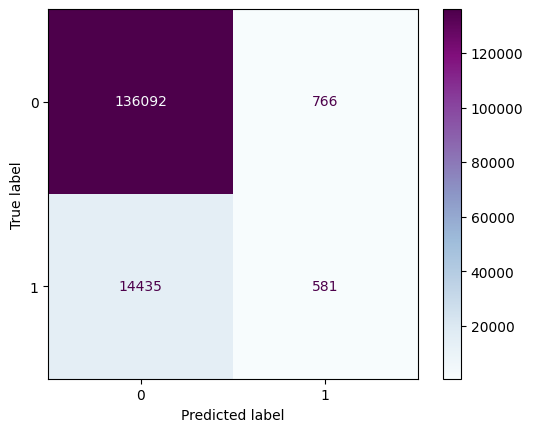

In [23]:
disp.plot(cmap="BuPu")

In [131]:
joblib.dump(lm, "logistic_regression_90.pkl")

['logistic_regression_90.pkl']